In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sampled_df =  pd.read_csv("sampled_df.csv", sep='delimiter')

/tmp/ipykernel_84/2671154299.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sampled_df =  pd.read_csv("sampled_df.csv", sep='delimiter')


In [3]:

all = pd.read_csv("/datasets/merck-files/Merck-files/all_important_cols.csv")

In [4]:
!pip install ablang==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 119.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 132.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 138.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 KB 62.8 MB/s eta 0:00:00
  Using cached Cython-0.29.33-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 KB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━

In [5]:
!pip install tensorboardX
from work import MerckEDA
from MerckEDA import OASDBDesc
all.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 17.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
2023-03-21 20:16:31.640360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 20:16:32.029103: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-21 20:16:32.124571: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLA

Unnamed: 0 v_call_heavy j_call_heavy v_call_light j_call_light  \
0           0  IGHV4-34*01     IGHJ6*03  IGLV1-40*01     IGLJ2*01   
1           1  IGHV3-73*02     IGHJ6*02  IGLV1-44*01     IGLJ3*02   
2           2  IGHV1-18*01     IGHJ4*02  IGLV3-19*01     IGLJ2*01   
3           3  IGHV1-18*01     IGHJ1*01  IGKV3-20*01     IGKJ4*01   
4           4  IGHV3-49*04     IGHJ4*02  IGLV4-69*01     IGLJ3*02   

                         sequence_alignment_aa_light  \
0  QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...   
1  QSVVTQPPSASGTPGQTVTISCSGSSSNIGRGSVCWYQQLSGMAPK...   
2  SSELTQDPAVSVALGQTVRITCQGDSLRSYYASWYQQKPGQAPVLV...   
3  EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...   
4  QLVLTQSPSASASLGASVKLTCSLTSTYSKYAIAWHQQKPQKGPRY...   

                         sequence_alignment_aa_heavy ANARCI_status_light  \
0  QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...               |||||   
1  EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAIHWVRQASGKGLE...               |||||   
2  QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...               |||||   
3  QVQLVQSGAEVKKPGASVKVSCKASGYTFADYGISWVRQAPGQGLE...               |||||   
4  EVQLVESGGGLVQPGRSLRLSCIGSGFTFSNYAINWVRQAPGKGLE...               |||||   

      ANARCI_status_heavy  
0  |Deletions: 10, 73||||  
1  |Deletions: 10, 73||||  
2  |Deletions: 10, 73||||  
3  |Deletions: 10, 73||||  
4  |Deletions: 10, 73||||

In [6]:
all['sequence_alignment_aa_light_len'] = [len(seq) for seq in all['sequence_alignment_aa_light']]
all['sequence_alignment_aa_heavy_len'] = [len(seq) for seq in all['sequence_alignment_aa_heavy']]
all = all.drop(columns = {"Unnamed: 0"})

In [7]:
def sample_data(df, count, sample_size):
    df_sample = pd.DataFrame()
    for i in range(count):
        df_temp = df.sample(n = 100, replace = False)
        df_temp["SampleNum"] = i
        if df_sample.empty:
            print('empty')
            df_sample = df_temp.copy()
        else:
            df_sample = pd.concat([df_sample, df_temp], ignore_index = True)
    return df_sample.copy()

In [8]:
count = 15
sample_size = 500
all_sampled = sample_data(all, count, sample_size)

empty


In [9]:
all_sampled

v_call_heavy j_call_heavy v_call_light j_call_light  \
0        IGHV1-3*01     IGHJ4*02  IGKV3-20*01     IGKJ2*01   
1       IGHV1-46*01     IGHJ5*02  IGLV1-40*01     IGLJ1*01   
2       IGHV3-72*01     IGHJ4*02   IGKV1-9*01     IGKJ4*01   
3     IGHV5-10-1*03     IGHJ4*02  IGLV1-44*01     IGLJ2*01   
4        IGHV2-2*02     IGHJ4*01  IGKV5-43*01     IGKJ2*01   
...             ...          ...          ...          ...   
1495     IGHV3-9*01     IGHJ4*02  IGLV1-51*02     IGLJ3*02   
1496     IGHV4-4*02     IGHJ4*02  IGKV1-39*01     IGKJ4*01   
1497   IGHV3-64D*09     IGHJ4*02   IGKV1-5*03     IGKJ1*01   
1498    IGHV2-26*01     IGHJ5*02  IGKV1-39*01     IGKJ4*01   
1499    IGHV5-51*01     IGHJ6*02  IGLV1-47*01     IGLJ1*01   

                            sequence_alignment_aa_light  \
0     EIVLTQSPGTLSLSPGERATLSCRASQSVSSNYLAWYQQKPGQAPR...   
1     QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...   
2     DIQLTQSPSFLSASLGDRVTITCRASQGISSYLAWYQQKPGKAPKL...   
3     QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNTVNWYQQLPGTAPK...   
4     DIVLTQSPATLSVTPGDSVSLSCRASQSISNNLHWYQQKSHESPRL...   
...                                                 ...   
1495  QSVLTQPPSVSAAPGQKVTISCSGSSSNIGNNYVSWYQQLPGTAPK...   
1496  DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...   
1497  DIQMTQSPSTLSASVGDRVTITCRASQSVSSWLAWYQQKPGKAPKL...   
1498  DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...   
1499  QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNYVYWYQQLPGTAPK...   

                            sequence_alignment_aa_heavy ANARCI_status_light  \
0     QVQLVQSGAEVKKPGASLTVSCEASGYTFTSYAVHWVRQAPGQRLE...               |||||   
1     QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...               |||||   
2     EVQLVESGGGLVQPGGSLRLSCAASGFTFSDHYMDWVRQAPGKGLE...               |||||   
3     EVQLVQSGAEVKKPGESLRISCKGSGYSFTSYWISWVRQMPGKGLE...               |||||   
4     QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...               |||||   
...                                                 ...                 ...   
1495  EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...               |||||   
1496  QVQLQESGPGLVKPSGTLSLTCAVSGGSISSSNWWSWIRQPPGKGL...               |||||   
1497  EVQLVESGGGLVQPGGSLRLSCSASGFTFTDYGMHWVRQAPGKGLE...               |||||   
1498  QVTLKESGPVLVKPTETLTLTCTVSGFSLSNARMGVSWIRQPPGKA...               |||||   
1499  EVQLVQSGAEVKKPGESLKISCKGSGYSFTSYWIGWVRQMPGKGLE...               |||||   

         ANARCI_status_heavy  sequence_alignment_aa_light_len  \
0     |Deletions: 10, 73||||                              108   
1     |Deletions: 10, 73||||                              111   
2     |Deletions: 10, 73||||                              107   
3     |Deletions: 10, 73||||                              110   
4     |Deletions: 10, 73||||                              107   
...                      ...                              ...   
1495  |Deletions: 10, 73||||                              110   
1496  |Deletions: 10, 73||||                              107   
1497  |Deletions: 10, 73||||                              107   
1498  |Deletions: 10, 73||||                              108   
1499  |Deletions: 10, 73||||                              111   

      sequence_alignment_aa_heavy_len  SampleNum  
0                                 118          0  
1                                 124          0  
2                                 124          0  
3                                 127          0  
4                                 116          0  
...                               ...        ...  
1495                              118         14  
1496                              121         14  
1497                              126         14  
1498                              120         14  
1499                              124         14  

[1500 rows x 11 columns]

In [10]:
enc = OneHotEncoder(handle_unknown="ignore")
ohe = enc.fit_transform(all_sampled[["v_call_heavy", "j_call_heavy", "v_call_light", "j_call_light"]]).toarray()

In [11]:
ohedf = pd.DataFrame(ohe, columns= enc.get_feature_names())
all_sampled = pd.concat([all_sampled, ohedf], axis = 1)
all_sampled

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


v_call_heavy j_call_heavy v_call_light j_call_light  \
0        IGHV1-3*01     IGHJ4*02  IGKV3-20*01     IGKJ2*01   
1       IGHV1-46*01     IGHJ5*02  IGLV1-40*01     IGLJ1*01   
2       IGHV3-72*01     IGHJ4*02   IGKV1-9*01     IGKJ4*01   
3     IGHV5-10-1*03     IGHJ4*02  IGLV1-44*01     IGLJ2*01   
4        IGHV2-2*02     IGHJ4*01  IGKV5-43*01     IGKJ2*01   
...             ...          ...          ...          ...   
1495     IGHV3-9*01     IGHJ4*02  IGLV1-51*02     IGLJ3*02   
1496     IGHV4-4*02     IGHJ4*02  IGKV1-39*01     IGKJ4*01   
1497   IGHV3-64D*09     IGHJ4*02   IGKV1-5*03     IGKJ1*01   
1498    IGHV2-26*01     IGHJ5*02  IGKV1-39*01     IGKJ4*01   
1499    IGHV5-51*01     IGHJ6*02  IGLV1-47*01     IGLJ1*01   

                            sequence_alignment_aa_light  \
0     EIVLTQSPGTLSLSPGERATLSCRASQSVSSNYLAWYQQKPGQAPR...   
1     QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...   
2     DIQLTQSPSFLSASLGDRVTITCRASQGISSYLAWYQQKPGKAPKL...   
3     QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNTVNWYQQLPGTAPK...   
4     DIVLTQSPATLSVTPGDSVSLSCRASQSISNNLHWYQQKSHESPRL...   
...                                                 ...   
1495  QSVLTQPPSVSAAPGQKVTISCSGSSSNIGNNYVSWYQQLPGTAPK...   
1496  DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...   
1497  DIQMTQSPSTLSASVGDRVTITCRASQSVSSWLAWYQQKPGKAPKL...   
1498  DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...   
1499  QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNYVYWYQQLPGTAPK...   

                            sequence_alignment_aa_heavy ANARCI_status_light  \
0     QVQLVQSGAEVKKPGASLTVSCEASGYTFTSYAVHWVRQAPGQRLE...               |||||   
1     QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...               |||||   
2     EVQLVESGGGLVQPGGSLRLSCAASGFTFSDHYMDWVRQAPGKGLE...               |||||   
3     EVQLVQSGAEVKKPGESLRISCKGSGYSFTSYWISWVRQMPGKGLE...               |||||   
4     QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...               |||||   
...                                                 ...                 ...   
1495  EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...               |||||   
1496  QVQLQESGPGLVKPSGTLSLTCAVSGGSISSSNWWSWIRQPPGKGL...               |||||   
1497  EVQLVESGGGLVQPGGSLRLSCSASGFTFTDYGMHWVRQAPGKGLE...               |||||   
1498  QVTLKESGPVLVKPTETLTLTCTVSGFSLSNARMGVSWIRQPPGKA...               |||||   
1499  EVQLVQSGAEVKKPGESLKISCKGSGYSFTSYWIGWVRQMPGKGLE...               |||||   

         ANARCI_status_heavy  sequence_alignment_aa_light_len  \
0     |Deletions: 10, 73||||                              108   
1     |Deletions: 10, 73||||                              111   
2     |Deletions: 10, 73||||                              107   
3     |Deletions: 10, 73||||                              110   
4     |Deletions: 10, 73||||                              107   
...                      ...                              ...   
1495  |Deletions: 10, 73||||                              110   
1496  |Deletions: 10, 73||||                              107   
1497  |Deletions: 10, 73||||                              107   
1498  |Deletions: 10, 73||||                              108   
1499  |Deletions: 10, 73||||                              111   

      sequence_alignment_aa_heavy_len  ...  x3_IGKJ2*03  x3_IGKJ2-1*01  \
0                                 118  ...          0.0            0.0   
1                                 124  ...          0.0            0.0   
2                                 124  ...          0.0            0.0   
3                                 127  ...          0.0            0.0   
4                                 116  ...          0.0            0.0   
...                               ...  ...          ...            ...   
1495                              118  ...          0.0            0.0   
1496                              121  ...          0.0            0.0   
1497                              126  ...          0.0            0.0   
1498                              120  ...          0.0            0.0   
1499     

# PCA (jackson)

In [12]:
obj = OASDBDesc.OASDBDesc()

df_seq =  pd.read_csv("/datasets/merck-files/Merck-files/sampled_df.csv")

df_seq.size 

5940

In [13]:
ohe = obj.one_hot_encode_seq(df_seq, "sequence_alignment_aa_heavy")

# Sampling (cheryl)

In [14]:
#small_df = df.sample(n = 1000, random_state = 48, replace = False)

# K-means clustering (cheryl)

In [15]:
from sklearn.cluster import KMeans


# U-Map (malavikha)

In [16]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 93.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=35c2eebb218f0b9b10fc68167edfb0c936379094196879ecbcfd5af88297a635
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=d791713865f4522234c3a3e1730e358d42d6825faa16e78a1609f8af4006b51d
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
import umap.umap_ as umap
reducer = umap.UMAP()

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
all_sampled.iloc[:, 8:].columns #length of relevant columns = 317

Index(['sequence_alignment_aa_light_len', 'sequence_alignment_aa_heavy_len',
       'SampleNum', 'x0_IGHV1-11*01', 'x0_IGHV1-16*01', 'x0_IGHV1-18*01',
       'x0_IGHV1-18*03', 'x0_IGHV1-18*04', 'x0_IGHV1-2*02', 'x0_IGHV1-2*04',
       ...
       'x3_IGKJ2*03', 'x3_IGKJ2-1*01', 'x3_IGKJ2-3*01', 'x3_IGKJ3*01',
       'x3_IGKJ4*01', 'x3_IGKJ5*01', 'x3_IGLJ1*01', 'x3_IGLJ2*01',
       'x3_IGLJ3*02', 'x3_IGLJ7*01'],
      dtype='object', length=307)

In [19]:
scaled_data = StandardScaler().fit_transform(all_sampled.iloc[:, 8:].values)

In [20]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape 

#(number of samples, feature columns)

(1500, 2)

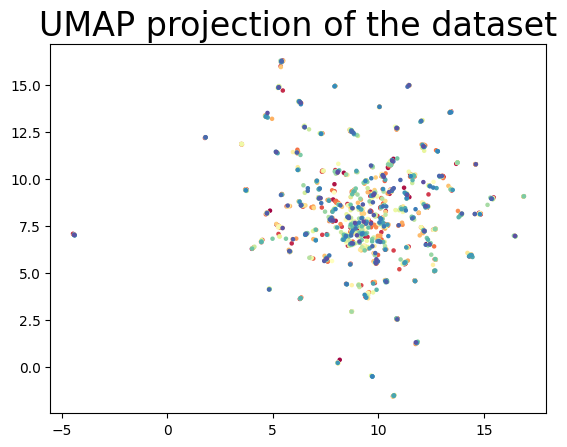

In [27]:
plt.scatter(embedding[:, 0], embedding[:, 1], c= np.arange(1500), s=5, cmap='Spectral')
plt.title('UMAP projection of the dataset', fontsize=24);


In [22]:
#normalise data

#['v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_aa_light', 'sequence_alignment_aa_heavy', 'ANARCI_status_light', 'ANARCI_status_heavy'] + column of heavy chain length and column of light chain data

# t-sne (malavikha)

"It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples." - from scikit-learn documentation

In [24]:
all_sampled.iloc[:, 8:]

sequence_alignment_aa_light_len  sequence_alignment_aa_heavy_len  \
0                                 108                              118   
1                                 111                              124   
2                                 107                              124   
3                                 110                              127   
4                                 107                              116   
...                               ...                              ...   
1495                              110                              118   
1496                              107                              121   
1497                              107                              126   
1498                              108                              120   
1499                              111                              124   

      SampleNum  x0_IGHV1-11*01  x0_IGHV1-16*01  x0_IGHV1-18*01  \
0             0             0.0             0.0             0.0   
1             0             0.0             0.0             0.0   
2             0             0.0             0.0             0.0   
3             0             0.0             0.0             0.0   
4             0             0.0             0.0             0.0   
...         ...             ...             ...             ...   
1495         14             0.0             0.0             0.0   
1496         14             0.0             0.0             0.0   
1497         14             0.0             0.0             0.0   
1498         14             0.0             0.0             0.0   
1499         14             0.0             0.0             0.0   

      x0_IGHV1-18*03  x0_IGHV1-18*04  x0_IGHV1-2*02  x0_IGHV1-2*04  ...  \
0                0.0             0.0            0.0            0.0  ...   
1                0.0             0.0            0.0            0.0  ...   
2                0.0             0.0            0.0            0.0  ...   
3                0.0             0.0            0.0            0.0  ...   
4                0.0             0.0            0.0            0.0  ...   
...              ...             ...            ...            ...  ...   
1495             0.0             0.0            0.0            0.0  ...   
1496             0.0             0.0            0.0            0.0  ...   
1497             0.0             0.0            0.0            0.0  ...   
1498             0.0             0.0            0.0            0.0  ...   
1499             0.0             0.0            0.0            0.0  ...   

      x3_IGKJ2*03  x3_IGKJ2-1*01  x3_IGKJ2-3*01  x3_IGKJ3*01  x3_IGKJ4*01  \
0             0.0            0.0            0.0          0.0          0.0   
1             0.0            0.0            0.0          0.0          0.0   
2             0.0            0.0            0.0          0.0          1.0   
3             0.0            0.0            0.0          0.0          0.0   
4             0.0            0.0            0.0          0.0          0.0   
...           ...            ...            ...          ...          ...   
1495          0.0            0.0            0.0          0.0          0.0   
1496          0.0            0.0            0.0          0.0          1.0   
1497          0.0            0.0            0.0          0.0          0.0   
1498          0.0            0.0            0.0          0.0          1.0   
1499          0.0            0.0            0.0          0.0          0.0   

      x3_IGKJ5*01  x3_IGLJ1*01  x3_IGLJ2*01  x3_IGLJ3*02  x3_IGLJ7*01  
0             0.0          0.0          0.0          0.0          0.0  
1             0.0          1.0          0.0          0.0          0.0  
2             0.0          0.0          0.0          0.0          0.0  
3             0.0          0.0          1.0          0.0          0.0  
4             0.0          0.0          0.0          0.0          0.0  
...           ...          ...          ...          .

In [25]:
from sklearn.manifold import TSNE

X = all_sampled.iloc[:, 8:]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(1500, 2)

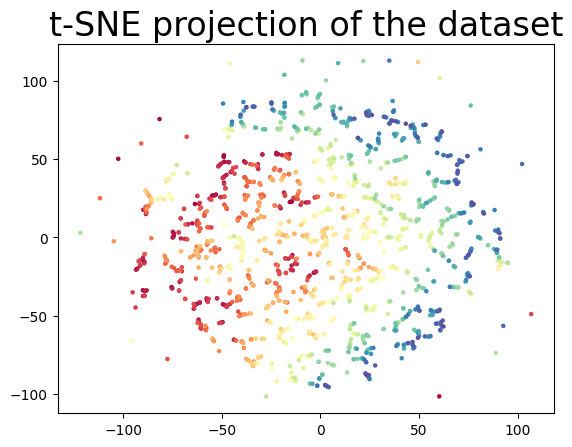

In [28]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c= np.arange(1500), s=5, cmap='Spectral')
plt.title('t-SNE projection of the dataset', fontsize=24);


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b236d6d-7b98-492c-b976-1e7a4e078701' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>